
# Regression & Interpolation


 
## Price Data
 

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2017-06-12,80.17,80.73,79.95,-0.174,80.35,80.31,3352279,20170612,0,0,0.7800,0.7800
2017-06-13,80.59,80.74,80.07,0.524,80.20,80.17,3174361,20170613,1,1,0.7224,0.7211
2017-06-14,80.84,80.92,79.62,0.310,80.11,80.59,4013089,20170614,2,2,0.9335,0.9422
2017-06-15,80.70,81.24,80.23,-0.173,80.38,80.84,2773369,20170615,3,3,0.9555,0.9630
2017-06-16,81.45,81.48,80.77,0.929,80.86,80.70,5914676,20170616,4,4,0.8966,0.8970


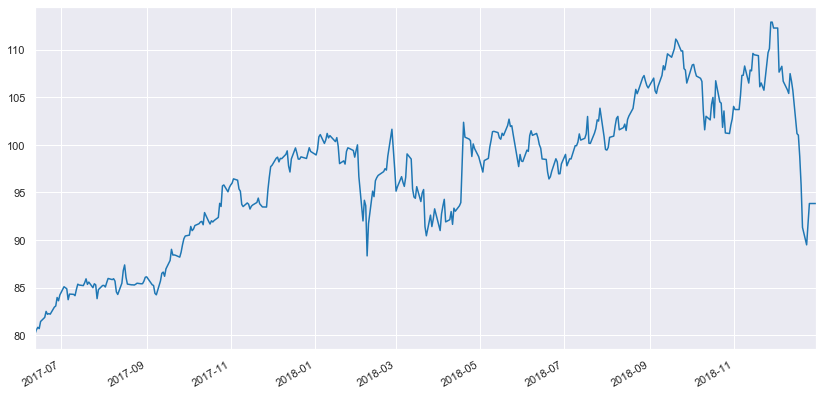

In [15]:
import numpy as np
import pandas as pd
from abupy import ABuSymbolPd

symbol = "usAXP"
# amex_df = ABuSymbolPd.make_kl_df(symbol)
amex_df = pd.read_csv('../../data/gen/{}_df.csv'.format(symbol),
                      parse_dates=True,
                      index_col=0)
# Strip whitespace from column names
amex_df.columns = amex_df.columns.str.strip()

# Get the Close Price
amex_close = amex_df.close
amex_close.plot()

# Print 
amex_df.head()


## Linear Regression

Find a Regression Model that describes the relationship between date (x) and close price (y) using OLS.

> y = kx + b


In [17]:
import statsmodels.api as sm
from statsmodels import regression
# x Series, date, independent variable
x = np.arange(0, amex_close.shape[0])
# y Series, close price, dependent variables
y = amex_close.values

def regress_y(y):
    y = y
    # x Series: 0，1，2, ...len(y)
    x = np.arange(0, len(y))
    x = sm.add_constant(x)
    # Regression using OLS
    model = regression.linear_model.OLS(y, x).fit()
    return model

model = regress_y(y)
b = model.params[0]
k = model.params[1]

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1110.
Date:                Tue, 11 Jun 2019   Prob (F-statistic):          3.77e-116
Time:                        21:56:01   Log-Likelihood:                -1084.5
No. Observations:                 392   AIC:                             2173.
Df Residuals:                     390   BIC:                             2181.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.6971      0.389    220.328      0.000      84.932      86.462
x1             0.0574      0.002     33.321      0.000       0.054       0.061
==============================================================================
Omnibus:                       65.569   Durbin-Watson:                   0.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.819
Skew:                          -0.843   Prob(JB):                     2.41e-34
Kurtosis:                       5.576   Cond. No.                         451.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


## Plotting 


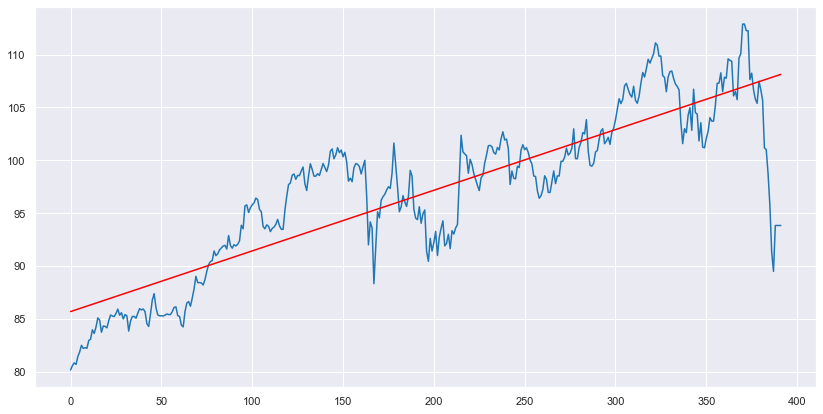

In [18]:
import matplotlib.pyplot as plt

# y = kx + b
y_fit = k * x + b
plt.plot(x, y)
plt.plot(x, y_fit, 'r')


## Goodness of Fit

### Calculating Goodness of Fit using `numpy`.

In [21]:

MAE = sum(np.abs(y - y_fit)) / len(y)
print('Mean Absolute Error (MAE):       {}'.format(MAE))

MSE = sum(np.square(y - y_fit)) / len(y)
print('Mean Squared Error (MSE):        {}'.format(MSE))

RMSE = np.sqrt(sum(np.square(y - y_fit)) / len(y))
print('Root Mean Squared Error (RMSE):  {}'.format(RMSE))


Mean Absolute Error (MAE):       3.003663358842458
Mean Squared Error (MSE):        14.806667082859585
Root Mean Squared Error (RMSE):  3.847943227603493



### Calculating Goodness of Fit using `sklearn`.

TODO: Why the diff in the end of 15th and 16th decimals places


In [22]:
from sklearn import metrics

print('sklearn MAE:     {}'.format(metrics.mean_absolute_error(y, y_fit))) 
print('sklearn MSE:     {}'.format(metrics.mean_squared_error(y, y_fit)))
print('sklearn RMSE:    {}'.format(np.sqrt(metrics.mean_squared_error(y, y_fit))))

sklearn MAE:     3.003663358842458
sklearn MSE:     14.806667082859589
sklearn RMSE:    3.8479432276034933



## Interpolation


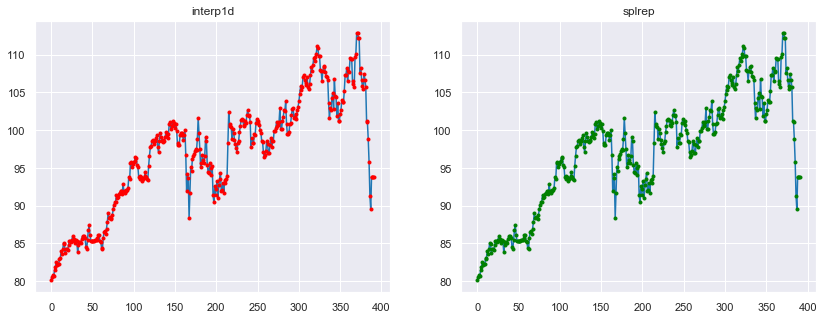

In [23]:
from scipy.interpolate import interp1d, splrep, splev
# Showcasing 2 interpolation
_, axs = plt.subplots(nrows=1,
                      ncols=2,
                      figsize=(14, 5))
# Linear Interpolation
linear_interp = interp1d(x, y)
axs[0].set_title('interp1d')
axs[0].plot(x,
            y, 
            '', 
            x, 
            linear_interp(x),
            'r.')
# B-Spline Interpolation
splrep_interp = splrep(x, y)
axs[1].set_title('splrep')
axs[1].plot(x,
            y,
            '',
            x,
            splev(
                x, 
                splrep_interp
            ),
            'g.')
